## 2D 数据类别划分（Meanshift 模型）

- 采用 Meanshift 算法实现 2D 数据自动聚类，预测 V1=80,V2=60 数据类别；
- 计算预测准确率，完成结果矫正；
- 与 KNN 和 Meanshift 算法对比；

数据：clustring/2d_data.csv


### 加载数据，观察数据中的两个维度是V1 和 V2，以及结果 labels

In [20]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('../dataset/clustering/2d_data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


### 分别设置特征数据 X 和 对应的结果数据 y

In [21]:
# define x and y
X = data.drop(['labels'], axis = 1)
y = data.loc[:, 'labels']
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


### 计算分类类别的计数，显示的通知 K-Means 算法有3个分类

分类0 有890个，分类1 有954个，分类2 有1156个

In [22]:
pd.Series(y).value_counts()

labels
2    1156
1     954
0     890
Name: count, dtype: int64

### 通过散点图观察三个分类的分布，每个群组（簇）的形状是凸的

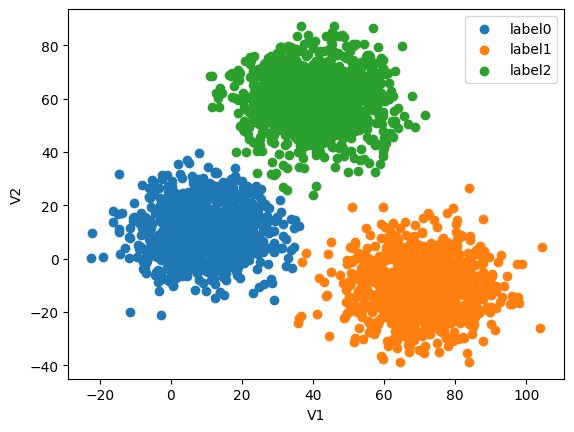

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2

fig1 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][mask0], X.loc[:, 'V2'][mask0])
label1 = plt.scatter(X.loc[:, 'V1'][mask1], X.loc[:, 'V2'][mask1])
label2 = plt.scatter(X.loc[:, 'V1'][mask2], X.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.show()

## 使用 Mean Shift 

Mean Shift 是一种基于密度的聚类算法，它通过寻找数据集中密度最大的区域来形成簇。与 K-Means 等其他聚类方法不同，Mean Shift 不需要预先指定簇的数量。相反，它通过一种称为“带宽”（bandwidth）的参数来控制聚类的粒度。

在 Mean Shift 中，“带宽”是一个关键参数，它定义了算法在搜索数据空间以找到模式或簇时的窗口大小。带宽决定了算法对数据点进行平均时的范围，从而影响最终形成的簇的数量和大小。较大的带宽值可能会导致更少的簇，因为算法会在更大的范围内对数据进行平滑处理，从而可能将多个小簇合并成一个大簇。相反，较小的带宽值可能会导致更多的簇，因为算法会在更小的范围内寻找密度峰值。

选择合适的带宽是 Mean Shift 算法成功的关键。如果带宽设置得太大，可能会导致过度平滑，从而丢失一些重要的簇结构；如果带宽设置得太小，则可能会产生过多的簇，甚至每个数据点都可能被视为一个单独的簇。

在实际应用中，通常需要通过交叉验证或其他方法来选择最佳的带宽参数。这可以通过评估不同带宽值下聚类结果的质量来实现，例如使用轮廓系数、Davies-Bouldin Index 等聚类评估指标。

总之，Mean Shift 算法中的“带宽”参数控制了聚类的粒度和数量，是算法性能的关键影响因素。选择合适的带宽值对于获得高质量的聚类结果至关重要。

### 首先估计模型的带宽

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bw = estimate_bandwidth(X, n_samples=500)
print(bw)

30.84663454820215


### 创建 Meanshift 实例，指定带宽参数，并进行训练

In [25]:
ms = MeanShift(bandwidth=bw)
ms.fit(X).get_params()

{'bandwidth': 30.84663454820215,
 'bin_seeding': False,
 'cluster_all': True,
 'max_iter': 300,
 'min_bin_freq': 1,
 'n_jobs': None,
 'seeds': None}

### 观察每个分类的质心

In [26]:
centers = ms.cluster_centers_
print(centers)

[[ 40.60158864  59.65137971]
 [ 70.01854306 -10.11803404]
 [  9.56752568  10.79316266]]


### 预测，并分别统计原始分类数据和预测分类数据的数量，对比分类偏差

In [27]:
y_predict_ms = ms.predict(X)
print(pd.Series(y_predict_ms).value_counts(), pd.Series(y).value_counts())

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


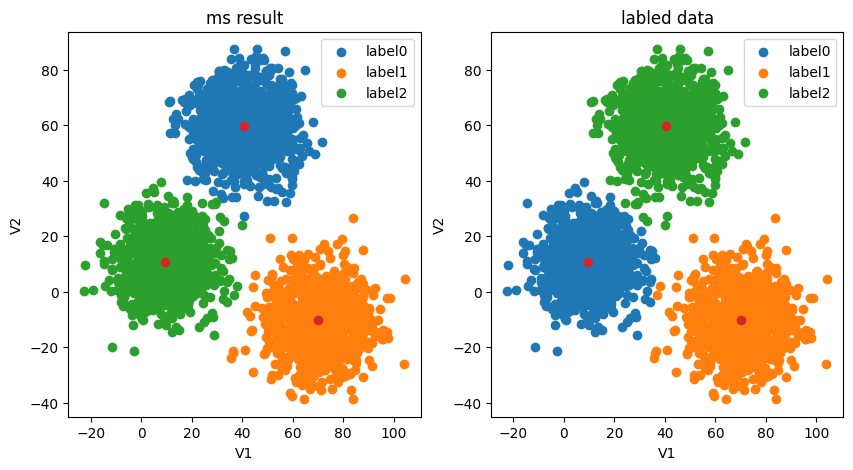

In [28]:
plt.figure(figsize=(10, 5))
fig6 = plt.subplot(1, 2, 1)
label0 = plt.scatter(
    X.loc[:, "V1"][y_predict_ms == 0], X.loc[:, "V2"][y_predict_ms == 0]
)
label1 = plt.scatter(
    X.loc[:, "V1"][y_predict_ms == 1], X.loc[:, "V2"][y_predict_ms == 1]
)
label2 = plt.scatter(
    X.loc[:, "V1"][y_predict_ms == 2], X.loc[:, "V2"][y_predict_ms == 2]
)

plt.title("ms result")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])

fig7 = plt.subplot(1, 2, 2)
label0 = plt.scatter(X.loc[:, "V1"][y == 0], X.loc[:, "V2"][y == 0])
label1 = plt.scatter(X.loc[:, "V1"][y == 1], X.loc[:, "V2"][y == 1])
label2 = plt.scatter(X.loc[:, "V1"][y == 2], X.loc[:, "V2"][y == 2])

plt.title("labled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

### 调整分类的偏差，2 和 0 对调

In [29]:
# correct the results
y_corrected_ms = []
for i in y_predict_ms:
    if i == 0:
        y_corrected_ms.append(2)
    elif i == 1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.Series(y_corrected_ms).value_counts(), pd.Series(y).value_counts())

2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [30]:
# convert the results to numpy array
y_corrected_ms = np.array(y_corrected_ms)
print(type(y_corrected_ms))
print(y_corrected.shape)

<class 'numpy.ndarray'>


NameError: name 'y_corrected' is not defined

### 可视化展示原始数据分类和预测的数据分类

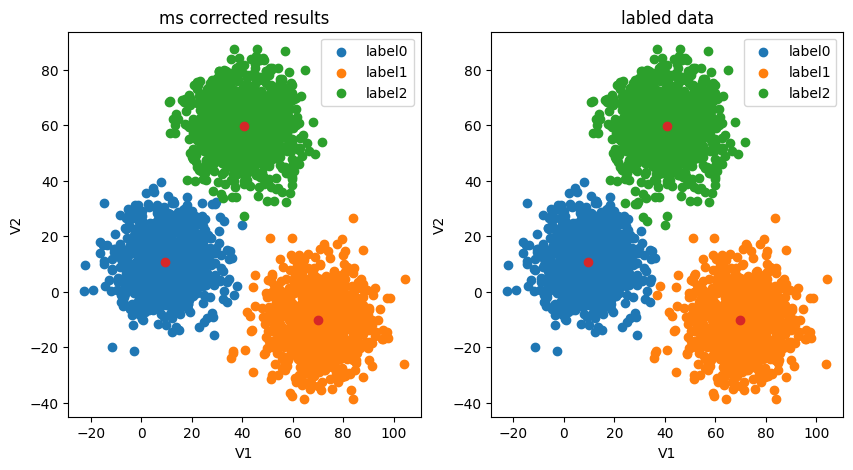

In [ ]:
plt.figure(figsize=(10, 5))
fig6 = plt.subplot(1, 2, 1)
label0 = plt.scatter(
    X.loc[:, "V1"][y_corrected_ms == 0], X.loc[:, "V2"][y_corrected_ms == 0]
)
label1 = plt.scatter(
    X.loc[:, "V1"][y_corrected_ms == 1], X.loc[:, "V2"][y_corrected_ms == 1]
)
label2 = plt.scatter(
    X.loc[:, "V1"][y_corrected_ms == 2], X.loc[:, "V2"][y_corrected_ms == 2]
)

plt.title("ms corrected results")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])

fig7 = plt.subplot(1, 2, 2)
label0 = plt.scatter(X.loc[:, "V1"][y == 0], X.loc[:, "V2"][y == 0])
label1 = plt.scatter(X.loc[:, "V1"][y == 1], X.loc[:, "V2"][y == 1])
label2 = plt.scatter(X.loc[:, "V1"][y == 2], X.loc[:, "V2"][y == 2])

plt.title("labled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()